```
<Integrantes del Grupo>
<Sofia Oliverio
Ramiro Jimenez
Pablo Carrazana>
```

# Análisis de índices y sectores

Es posible resumir el rendimiento de distintos segmentos del mercado de acciones mediante la creación de **índices**: portafolios hipotéticos formados por una gran cantidad de activos. El cálculo del valor de los índices se calcula a partir de la evolución de los precios de sus constituyentes. Esto es muy útil para las personas que invierten, ya que les da una idea general de la *salud del mercado* y además permite hacer comparaciones con sus estrategias de inversión (está acción se denomina *benchmarking*).

Los 3 índices de acciones de Estados Unidos más conocidos son:
- Dow Jones Industrial Average (DJIA),
- S&P 500 Index y
- Nasdaq Composite Index.

## El Índice S&P 500
El *Standard and Poor's 500 Index* es un índice compuesto por las 500 empresas públicas con mayor capitalización de mercado de EE.UU. La capitalización de mercado (market cap) es el valor total de mercado que tienen la totalidad de las acciones de una compañía, lo que nos da una idea rápida del tamaño de la misma (solamente necesitamos multiplicar el valor de su acción por la cantidad de acciones existentes). En [este link](https://www.investopedia.com/top-10-s-and-p-500-stocks-by-index-weight-4843111) pueden ver cuáles son las 10 empresas top en el S&P500 al 4 de junio de 2021.

No siempre es posible invertir directamente en un índice, pero existen numerosas compañías que crean Fondos de Inversión que se dedican a seguir estos índices y es posible que las personas inviertan en ellos. Este tipo de instrumentos es muy importante porque le permite a los pequeños inversores diversificar su cartera de inversiones sin tener una cantidad enorme de dinero para comprar acciones de todas las empresas que componen los índices. En EE.UU, estos tipos de fondos son llamados Exchange Traded Funds (ETFs) y son un poco similares a los Fondos Comunes de Inversión locales (FCI). El ETF más conocido para invertir en el S&P500 es el SPDR S&P 500 ETF (su ticker es **SPY**) y lo podemos seguir en nuestro DataReader.

In [ ]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from functools import reduce
import plotly.graph_objects as go

[*********************100%***********************]  1 of 1 completed


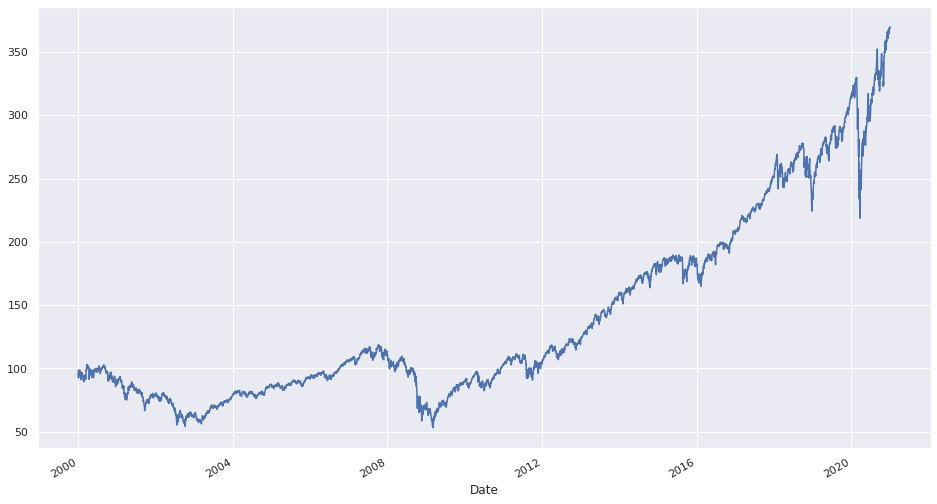

In [ ]:
yf.pdr_override()

tickers = ['SPY']

start_date = '2000-01-01'
end_date = '2020-12-31'

data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)["Adj Close"].plot(figsize=(16,9))

# Qué acciones componen actualmente al S&P500?

Es posible conseguir la lista de constituyentes del S&P500 desde Wikipedia: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies. Pero también podemos obtener esta tabla directamente con Pandas!

In [ ]:
# Podemos usar la función 'read_html' de Pandas, a la cual le mandamos nuestra URL y nos devuelve una lista de DataFrames que Pandas pudo rescatar desde la página.
# Vamos a usarla para obtener nuestra lista de constituyentes.
snp = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
df = pd.DataFrame(snp[0])
df
#snp

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Chicago, Illinois",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Sectores
Como se puede observar en la tabla, cada compañía que cotiza públicamente en la bolsa puede ser asignada a un sector e incluso a un subsector (GICS Sector, GICS Sub-Industry).

### Ejercicios
- Cuántos distintos sectores existen actualmente entre las empresas del S&P500? Cuántas acciones por sector hay?

- Elijamos 3 sectores existentes y para cada uno de ellos, construyamos un índice con las compañías del S&P500 que pertenezcan a él y que el valor del mismo sea la suma de una acción de cada empresa del sector en el cierre ajustado (Adj Close).

- Graficar todos estos índices en un mismo lugar, junto al S&P500, para todo lo que va del 2021. Es posible que haya que normalizarlos para poder comparar mejor su rendimiento, cómo podemos hacerlo? Podemos calcular su Sharpe Ratio?

#### Análisis de sectores

In [ ]:
# Generar una copia del df original
snp_copy=df.copy()

# Visualizar los sectores disponibles
list_seccion = snp_copy['GICS Sector'].unique().tolist()

# Imprimir la lista de los sectores disponibles
print("Lista de sectores disponibles:", list_seccion)

# Imprimir la cantidad de secciones existentes
print("Cantidad de secciones:", len(list_seccion))

# Imprimir la cantidad de secciones por sector
# En base a estas cantidades elegimos los sectores

result = snp_copy.groupby('GICS Sector')['Symbol'].nunique()
print("Cantidad de acciones por sector del S&P500:", result)

Lista de sectores disponibles: ['Industrials', 'Health Care', 'Information Technology', 'Communication Services', 'Consumer Discretionary', 'Utilities', 'Financials', 'Materials', 'Real Estate', 'Consumer Staples', 'Energy']
Cantidad de secciones: 11
Cantidad de acciones por sector del S&P500: GICS Sector
Communication Services    26
Consumer Discretionary    63
Consumer Staples          32
Energy                    22
Financials                65
Health Care               64
Industrials               74
Information Technology    74
Materials                 28
Real Estate               29
Utilities                 28
Name: Symbol, dtype: int64


#### Selección de sectores
Al visualizar que los sectores que más repeticiones tienen son: 

*   Information Technology: 74
*   Financials: 65
*   Health Care: 64

Se eligen los mismos para realizar el análisis.



In [ ]:
# Filtrar por los sectores elegidos
# Los sectores elgidos: Information Technology, Financials, Health Care
result_sector = snp_copy[snp_copy['GICS Sector'].isin(['Health Care','Information Technology','Financials']) ]

# Imrpimir el resultado obtenido de filtrar los sectores elegidos
result_sector

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Chicago, Illinois",2011-07-06,1467373,1989
6,ADBE,Adobe,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
...,...,...,...,...,...,...,...,...,...
498,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",1999-11-08,743988,1984
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
#Buscamos tickers que pertenecen a los sectores elegidos
tickers_snp = result_sector['Symbol'].tolist()

# Definimos el rango de fechas deseado
start_date = '2021-01-01'
end_date = '2021-12-31'

# Obtenemos un DataFrame
df_tickers = data.DataReader(
    tickers_snp,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)

[*********************100%***********************]  203 of 203 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


In [ ]:
#Cambiar filas por columnas para poder realizar el join con el dataframe result_sector
df_tr= df_tickers['Adj Close'].transpose()

#Crear nuevo dataframe donde se agregan los Precios cerrados ajustados de los tickers
df_join = result_sector.join(df_tr.reindex(df_tr.index, level=0),on = 'Symbol')

# Imprimir las primeras 5 filas del nuevo dataframe
df_join[:5]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,2020-12-31 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,2021-01-14 00:00:00,2021-01-15 00:00:00,2021-01-19 00:00:00,2021-01-20 00:00:00,2021-01-21 00:00:00,2021-01-22 00:00:00,2021-01-25 00:00:00,2021-01-26 00:00:00,2021-01-27 00:00:00,2021-01-28 00:00:00,2021-01-29 00:00:00,2021-02-01 00:00:00,2021-02-02 00:00:00,2021-02-03 00:00:00,2021-02-04 00:00:00,2021-02-05 00:00:00,2021-02-08 00:00:00,2021-02-09 00:00:00,2021-02-10 00:00:00,2021-02-11 00:00:00,2021-02-12 00:00:00,2021-02-16 00:00:00,...,2021-05-18 00:00:00,2021-05-19 00:00:00,2021-05-20 00:00:00,2021-05-21 00:00:00,2021-05-24 00:00:00,2021-05-25 00:00:00,2021-05-26 00:00:00,2021-05-27 00:00:00,2021-05-28 00:00:00,2021-06-01 00:00:00,2021-06-02 00:00:00,2021-06-03 00:00:00,2021-06-04 00:00:00,2021-06-07 00:00:00,2021-06-08 00:00:00,2021-06-09 00:00:00,2021-06-10 00:00:00,2021-06-11 00:00:00,2021-06-14 00:00:00,2021-06-15 00:00:00,2021-06-16 00:00:00,2021-06-17 00:00:00,2021-06-18 00:00:00,2021-06-21 00:00:00,2021-06-22 00:00:00,2021-06-23 00:00:00,2021-06-24 00:00:00,2021-06-25 00:00:00,2021-06-28 00:00:00,2021-06-29 00:00:00,2021-06-30 00:00:00,2021-07-01 00:00:00,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,NaN,108.274658,109.614319,109.386086,110.447891,110.755516,109.991402,108.006714,111.291382,109.637451,110.892845,112.158195,112.477020,112.536797,112.427200,114.300331,114.310295,113.871902,119.949585,123.137878,122.091721,119.800133,119.780205,119.301964,123.576271,124.044548,124.692177,124.831657,126.375984,127.760902,127.551674,...,116.980003,116.379997,117.800003,117.129997,117.290001,118.400002,116.750000,115.690002,116.650002,105.790001,106.900002,109.199997,109.290001,110.000000,107.900002,109.050003,110.150002,109.910004,110.480003,110.410004,110.059998,111.629997,110.330002,111.440002,110.959999,110.839996,111.699997,112.720001,115.699997,117.209999,115.930000,117.160004,118.040001,118.820000,119.870003,119.260002,119.739998,118.809998,118.650002,117.169998
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),NaN,102.939789,104.004242,103.105804,104.209320,104.756195,106.465187,107.207375,109.814804,110.289040,109.192368,110.832436,111.267151,109.923485,109.528290,109.172615,107.493042,101.555229,102.958176,101.248955,101.071121,102.227066,105.665253,107.226280,107.423882,105.556580,104.133881,102.800095,102.503700,103.185410,102.948288,...,117.209999,115.849998,117.110001,116.120003,115.910004,114.559998,114.699997,112.320000,113.199997,112.209999,111.400002,112.209999,112.360001,113.010002,112.339996,114.000000,116.239998,115.419998,115.400002,115.830002,115.529999,114.900002,113.120003,114.730003,114.699997,114.000000,114.739998,112.980003,113.000000,112.300003,112.639999,114.260002,115.169998,115.730003,116.750000,116.349998,116.580002,117.629997,117.910004,117.360001
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,NaN,316.730011,322.600006,321.609985,323.559998,324.059998,324.589996,324.670013,323.709991,318.309998,329.690002,336.299988,347.869995,348.559998,347.899994,348.320007,340.890015,328.600006,355.130005,348.250000,341.859985,347.839996,326.230011,324.779999,327.850006,325.859985,324.480011,324.510010,322.929993,328.359985,322.779999,...,272.970001,273.980011,276.390015,280.000000,279.579987,283.880005,282.269989,285.850006,284.579987,279.700012,280.279999,283.850006,289.510010,291.149994,289.170013,293.820007,298.130005,299.190002,302.869995,301.720001,303.299988,312.609985,318

In [ ]:
#Sumar los precios de cierre ajustados agrupando por sector
df_group = df_join.groupby('GICS Sector').sum()

#Borrar filas por columnas para que las fechas sean mis indices
df_group_tr = df_group.transpose()

In [ ]:
# Borrar la fila con el calculo de CIK
df_group_tr = df_group_tr.drop(df_group_tr[df_group_tr.index == 'CIK'].index)

In [ ]:
# Imprimir las primeros 5 filas del nuevo dataframe transpose
df_group_tr[:5]

GICS Sector,Financials,Health Care,Information Technology
2020-12-31 00:00:00,0.000000,0.000000,0.000000
2021-01-04 00:00:00,7704.738574,13885.474871,13361.928696
2021-01-05 00:00:00,7697.217638,14026.940384,13473.705464
2021-01-06 00:00:00,7978.401819,14229.667562,13395.365120
2021-01-07 00:00:00,8083.685004,14476.070024,13774.252742


#### DataFrame con los sectores elegidos 

In [ ]:
# Agregar la columna de fecha al data frame
df_group_tr['Date'] = df_group_tr.index

# Definir de rango de fechas
start_date= '2021-01-01'
end_date= '2021-12-12'

# Filtrar tickers del año 2021
df_group_tr_2021 = df_group_tr[df_group_tr.Date.between(start_date, end_date)]

# Imprimir Dataframe de los sectores elegidos para el período de 2021
df_group_tr_2021

GICS Sector,Financials,Health Care,Information Technology,Date
2021-01-04,7704.738574,13885.474871,13361.928696,2021-01-04
2021-01-05,7697.217638,14026.940384,13473.705464,2021-01-05
2021-01-06,7978.401819,14229.667562,13395.365120,2021-01-06
2021-01-07,8083.685004,14476.070024,13774.252742,2021-01-07
2021-01-08,8076.796041,14594.948919,13907.950668,2021-01-08
...,...,...,...,...
2021-07-08,9341.719974,16483.660048,15483.069974,2021-07-08
2021-07-09,9582.690004,16553.070081,15659.989965,2021-07-09
2021-07-12,9672.919972,16583.010031,15677.400016,2021-07-12
2021-07-13,9572.589996,16553.799984,15640.880003,2021-07-13


In [ ]:
# Guardar en un dataFrame los datos de Adj Close del S&P500
# Se filtran estos datos para posteriormente agregarlos al nuevo datafram con 
# los sectores elegidos
dfP500 = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)["Adj Close"].to_frame()



[*********************100%***********************]  1 of 1 completed


In [ ]:
# Unir los dos dataFrame para tener un solo data frame los ADJClose de Financials, Information Technology, HealthCare y S&P500
df_merge= df_group_tr_2021.merge(dfP500, left_on='Date', right_on='Date')

# Asignar nombres a las columnas
df_merge.columns = ['FinancialsAdjClose', 'HealthCareAdjClose', 'InformationTechnologyAdjClose', 'Date', 'SPYAdjClose']

# Ordenar nombres de las columnas
df_merge = df_merge [['Date', 'FinancialsAdjClose', 'HealthCareAdjClose', 'InformationTechnologyAdjClose', 'SPYAdjClose']]

# Imprimir el data frame mergeado
df_merge

,Date,FinancialsAdjClose,HealthCareAdjClose,InformationTechnologyAdjClose,SPYAdjClose
0,2021-01-04,7704.738574,13885.474871,13361.928696,366.387390
1,2021-01-05,7697.217638,14026.940384,13473.705464,368.910828
2,2021-01-06,7978.401819,14229.667562,13395.365120,371.116394
3,2021-01-07,8083.685004,14476.070024,13774.252742,376.630249
4,2021-01-08,8076.796041,14594.948919,13907.950668,378.776184
...,...,...,...,...,...
128,2021-07-08,9341.719974,16483.660048,15483.069974,430.920013
129,2021-07-09,9582.690004,16553.070081,15659.989965,435.519989
130,2021-07-12,9672.919972,16583.010031,15677.400016,437.079987
131,2021-07-13,9572.589996,16553.799984,15640.880003,435.589996


In [ ]:
# Crear funcion para agregar los datos de Close,Open,Low y High

def crea_df_metrica_sector(metrica):
  # Cambio filas por columnas para poder realizar el join con el dataframe result_sector
  df_tr= df_tickers[metrica].transpose()
  # Creo nuevo dataframe donde se agregan los Precios cerrados ajustados de los tickers
  df_join = result_sector.join(df_tr.reindex(df_tr.index, level=0),on = 'Symbol')
  # Sumo los precios de cierre ajustados agrupando por sector
  df_group = df_join.groupby('GICS Sector').sum()
  # Cambio filas por columnas para que las fechas sean mis indices
  df_group_tr = df_group.transpose()
  # Borro la fila con el calculo de CIK
  df_group_tr = df_group_tr.drop(df_group_tr[df_group_tr.index == 'CIK'].index)
  # Agregar la columna de fecha al data frame
  df_group_tr['Date'] = df_group_tr.index

  # Definición de rango de fechas
  start_date= '2021-01-01'
  end_date= '2021-12-12'

  # Guardar en un dataFrame los datos de Adj Close del S&P500
  dfP500 = data.DataReader(
      tickers,
      start=start_date, 
      end=end_date, 
      data_source='yahoo',
  )[metrica].to_frame()

  # Filtrar año 2021
  df_group_tr_2021 = df_group_tr[df_group_tr.Date.between(start_date, end_date)]

  # Unir dos dataFrame para tener un solo dataframe los ADJClose de Financials, Information Technology, HealthCare y S&P500
  df_merge= df_group_tr_2021.merge(dfP500, left_on='Date', right_on='Date')
  df_merge.columns = ['Financials' + metrica, 'HealthCare' + metrica, 'InformationTechnology' + metrica, 'Date', 'SPY' + metrica]
  df_merge = df_merge [['Date', 'Financials'+metrica, 'HealthCare'+metrica,
       'InformationTechnology'+metrica,'SPY'+metrica]]
  return df_merge


In [ ]:
# Creamos Dataframes para los indices
df_open= crea_df_metrica_sector('Open')
df_close= crea_df_metrica_sector('Close')
df_low= crea_df_metrica_sector('Low')
df_high= crea_df_metrica_sector('High')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Merge de los dataframes
df_merge_fin = reduce(lambda left,right: pd.merge(left,right,on=['Date']), 
                            [df_merge,df_open,df_close,df_low,df_high])
df_merge_fin[:5]

,Date,FinancialsAdjClose,HealthCareAdjClose,InformationTechnologyAdjClose,SPYAdjClose,FinancialsOpen,HealthCareOpen,InformationTechnologyOpen,SPYOpen,FinancialsClose,HealthCareClose,InformationTechnologyClose,SPYClose,FinancialsLow,HealthCareLow,InformationTechnologyLow,SPYLow,FinancialsHigh,HealthCareHigh,InformationTechnologyHigh,SPYHigh
0,2021-01-04,7704.738574,13885.474871,13361.928696,366.387390,7927.340009,14079.994308,13684.559946,375.309998,7774.770047,13924.221920,13407.049994,368.790009,7692.330026,13678.371365,13229.376014,364.820007,7970.639941,14206.200260,13842.831905,375.450012
1,2021-01-05,7697.217638,14026.940384,13473.705464,368.910828,7763.280044,13892.405279,13388.399916,368.100006,7766.510026,14065.835470,13519.230002,371.329987,7661.154999,13807.410082,13302.284981,368.049988,7856.660042,14174.331707,13612.200025,372.500000
2,2021-01-06,7978.401819,14229.667562,13395.365120,371.116394,7861.639981,13922.869291,13408.065089,369.709991,8050.600006,14269.376799,13440.804971,373.549988,7800.129995,13856.531660,13261.207018,369.119995,8125.840001,14394.175385,13713.451979,376.980011
3,2021-01-07,8083.685004,14476.070024,13774.252742,376.630249,8122.550042,14320.299038,13572.779961,376.100006,8151.530049,14516.291824,13819.775050,379.100006,8057.230050,14241.711056,13526.500002,375.910004,8246.360047,14608.405634,13906.345011,379.899994
4,2021-01-08,8076.796041,14594.948919,13907.950668,378.776184,8161.200017,14561.395815,13931.709978,380.589996,8144.070008,14635.267120,13953.110095,381.260010,8019.249985,14419.619188,13744.874028,377.100006,8225.340015,14795.925779,14134.850049,381.489990


#### Gráfico de los Adj Close SIN normalizar

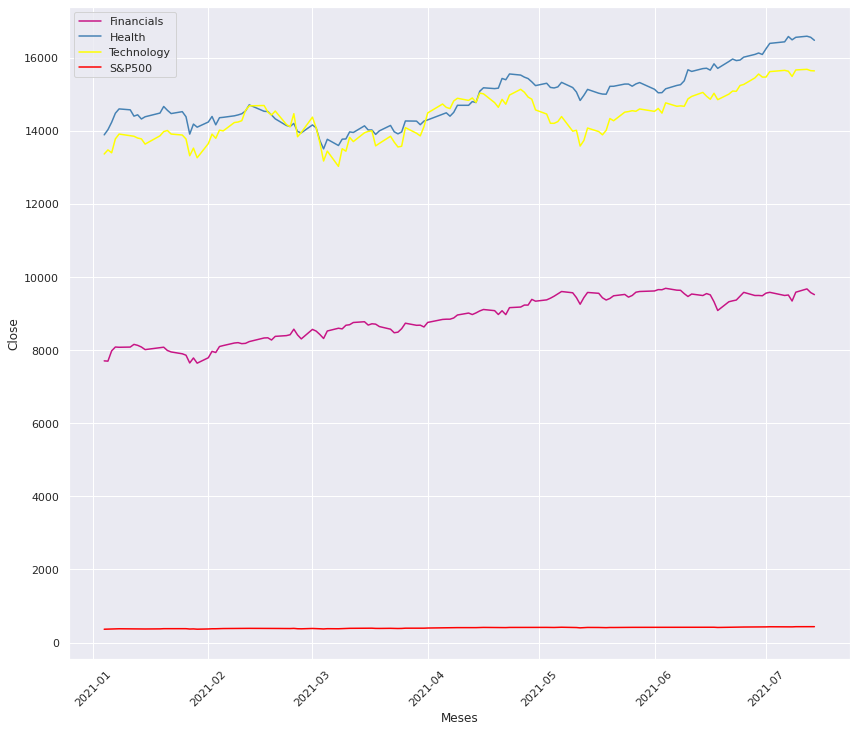

In [ ]:
#Gráficar los Adj Close de los sectores elegidos y el S&P500
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(df_merge['Date'],df_merge['FinancialsAdjClose'], color='mediumvioletred')
plt.plot(df_merge['Date'],df_merge['HealthCareAdjClose'], color='steelblue')
plt.plot(df_merge['Date'],df_merge['InformationTechnologyAdjClose'], color='yellow')
plt.plot(df_merge['Date'],df_merge['SPYAdjClose'], color='red')

plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend(['Financials','Health','Technology','S&P500'])

plt.show()

Advertimos que las diferencias en las escalas dificultan la comparación entre los cierres ajustados de cada activo, pudiendo conducirnos a análisis equivocados. Por ejemplo, a primera vista pareceira que el cierre del SP500 durante 2021  no se vió afectado por las variaciones experimentadas por los cierres de los sectores Financieros, Tecnoógicos y de Serivicios de Salud los cual es poco consistente.Por tal motivo es conveniente normalizar los datos para poder realizar la comparación, de lo contrario es imposible comparar los Adj Close de estas variables.

Las escalas de cada adj close es muy diferente por tal motivo es conveniente normalizar los datos para poder realizar la comparación, de lo contrario es imposible comparar los Adj Close de estas variables.

#### Normalización de los Adj Close
Se normalizan a continuación los Adj Close de los sectores elegidos y del S&P500

In [ ]:
# Normalizar los Adj Close de Financials
df_merge_normal_financials = df_merge.FinancialsAdjClose.values.copy().reshape(-1,1)
df_merge_normal_financials_scaled = RobustScaler().fit_transform(df_merge_normal_financials)

# Normalizar los Adj Close de HealthCare
df_merge_normal_healthCareAdjClose = df_merge.HealthCareAdjClose.values.copy().reshape(-1,1)
df_merge_normal_healthCareAdjClose_scaled = RobustScaler().fit_transform(df_merge_normal_healthCareAdjClose)

# Normalizar los Adj Close de InformationTechnology
df_merge_normal_TechnologyAdjClose = df_merge.InformationTechnologyAdjClose.values.copy().reshape(-1,1)
df_merge_normal_TechnologyAdjClose_scaled = RobustScaler().fit_transform(df_merge_normal_TechnologyAdjClose)

# Normalizar los Adj Close de S&P500
df_merge_normal_s = df_merge.SPYAdjClose.values.copy().reshape(-1,1)
df_merge_normal_s_scaled = RobustScaler().fit_transform(df_merge_normal_s)

# Mergear de todos los valores normalizados
df_merge_normalizada = pd.DataFrame(list(zip(df_merge_normal_financials_scaled,df_merge_normal_healthCareAdjClose_scaled,df_merge_normal_TechnologyAdjClose_scaled,df_merge_normal_s_scaled, df_merge.Date)), columns = ['Financials','Health','Technology','SP500','Date'])

# Imprimir dataframe normalizado
df_merge_normalizada

,Financials,Health,Technology,SP500,Date
0,[-1.1014489695231895],[-0.7665607326569913],[-1.0246016832440348],[-1.2508188638538853],2021-01-04
1,[-1.1080528038887028],[-0.6323848399411889],[-0.9109484354637538],[-1.1734578648820846],2021-01-05
2,[-0.8611561734817074],[-0.4401040533245501],[-0.9906039370619778],[-1.1058418369494947],2021-01-06
3,[-0.7687112019896184],[-0.20639854056562096],[-0.605355649093032],[-0.9368036382722137],2021-01-07
4,[-0.7747601258002138],[-0.09364539337427334],[-0.46941323682362357],[-0.8710157279865726],2021-01-08
...,...,...,...,...,...
128,[0.33591919905701445],[1.6977417514929893],[1.132148758849606],[0.7275571427101236],2021-07-08
129,[0.5475053856378356],[1.763575132583358],[1.3120388367891493],[0.8685785496496732],2021-07-09
130,[0.6267327268855684],[1.7919722975600254],[1.3297411625440956],[0.9164033796787041],2021-07-12
131,[0.5386369708706702],[1.76426742439396],[1.2926080612846715],[0.8707247635094993],2021-07-13


#### Gráfico de los Adj Close normalizados

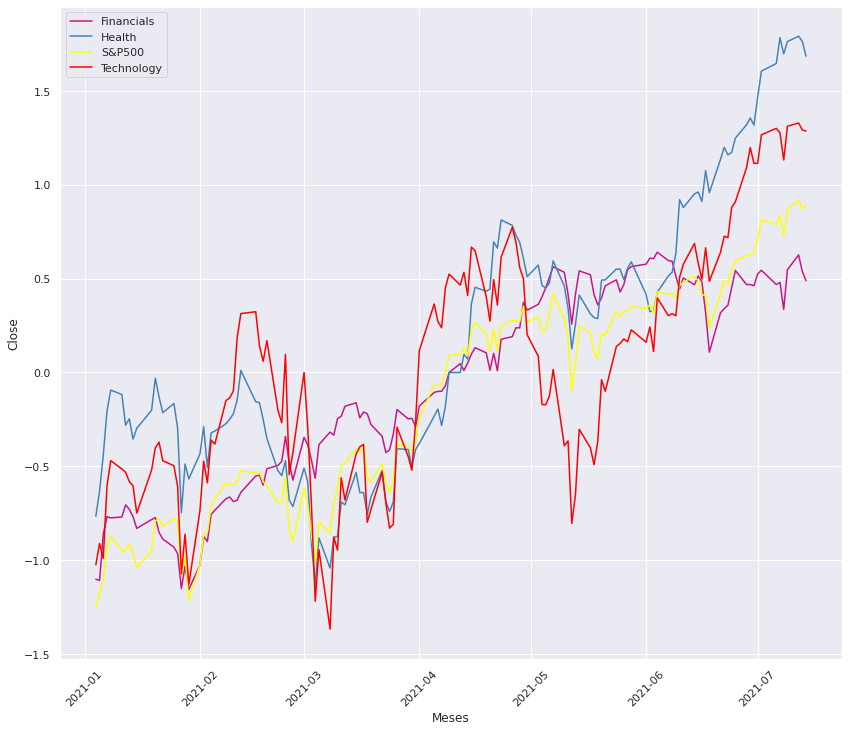

In [ ]:
#Gráfico de los Adj Close de los sectores elegidos y S&P500 Normalizados
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(df_merge_normalizada['Date'],df_merge_normalizada['Financials'], color='mediumvioletred')
plt.plot(df_merge_normalizada['Date'],df_merge_normalizada['Health'], color='steelblue')
plt.plot(df_merge_normalizada['Date'],df_merge_normalizada['SP500'], color='red')
plt.plot(df_merge_normalizada['Date'],df_merge_normalizada['Technology'], color='yellow')

plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)
plt.xticks(rotation=45)
plt.legend(['Financials','Health','S&P500','Technology'])

plt.show()

Luego de la normalización es posible realizar comparaciones en una misma escala. Esta transformación corrige las dificultades señaladas anteriormente y permite visualizar como las variaciones en el sp500 siguen la misma dirección que las variaciones en los activos que lo componen. Se observa que a partir de junio el precio de cierre del sector salud aumenta el ritmo de crecimiento mientras que el precio de cierre del sector financiero cae sin poder recuperar los niveles previos.

#### Cálculo de volatilidad


In [ ]:
# Cálcular los retornos de S&P500
s = pd.Series(df_merge['SPYAdjClose'].squeeze())
return_SP500 = (s.pct_change(periods=1, fill_method='pad', limit=None, freq=None))*100

# Imprimir resultados
print("Describe de los retornos de S&P500:\n", return_SP500.describe())
print("")

# Imprimir la media y la desviación
print("Media y desviación")
print("Std:", return_SP500.std())
print("Mean:", return_SP500.mean())

Describe de los retornos de S&P500:
 count    132.000000
mean       0.135675
std        0.826161
min       -2.444049
25%       -0.262960
50%        0.118582
75%        0.626161
max        2.424014
Name: SPYAdjClose, dtype: float64

Media y desviación
Std: 0.8261606174261485
Mean: 0.1356752897756368


#### Cálculo sharpe ratio

In [ ]:
# Calcular del sharpe ratio de los retornos de S&P500
excess_Return = (return_SP500.mean() - 0) / return_SP500.std()

print("Exceso de retornos:", excess_Return) 

Exceso de retornos: 0.16422386508609504


Intentamos calcular la volatilidad y sharpe ratio para los datos normalizados y no obtuvimos ningún resultado, posteriormente lo hicimos con los datos sin normalizar y logramos obtener los valores correspondientes a la volatilidad y al sharpe ratio.

## Cisnes Negros

Un Cisne Negro (Black Swan) es un evento impredecible que trae consecuencias potencialmente muy severas. Estos eventos tienen como características principales su extrema rareza, impacto severo y la idea de que, mirando al pasado, era obvio que iban a ocurrir.

Un ejemplo famoso de cisne negro en el mercado estadounidense fue la "Burbuja de las DotCom": Una rápida subida de valor en las acciones de las empresas de base tecnológica hizo que el índice Nasdaq subiera su valor de 1000 a más de 5000 en un período de 5 años (1995-2000). En 2001, el índice tardó aproximadamente 7 meses en bajar un 76%, volviendo a una valoración de 1136, con pérdidas del 80% del valor en casos como los de Cisco, Intel y Oracle. El índice tardó luego 15 años en volver al valor de finales del 2000. Para más información, se puede visitar el [siguiente link](https://www.investopedia.com/terms/d/dotcom-bubble.asp).

Para identificar cisnes negros en el mercado financiero, podemos usar los retornos diarios de las acciones y ajustar una distribución de probabilidad normal sobre los mismos. Aquellos retornos que estén por encima o por debajo de 3 o más desviaciones estándar pueden ser considerados cisnes negros.

### Ejercicios
- Cuántos de estos eventos existieron en el S&P500 desde el año 2000 hasta la fecha y cuándo ocurrieron esos eventos? Es posible encontrar algunas noticias relacionadas con esas fechas?

- Supongamos que invertimos U$D 1.000 en el SPY a comienzos del 2000 y que además teníamos una bola de cristal, pudiendo dejar de invertir nuestro dinero justo el día anterior a un cisne negro y reinvertirlo el día después. Cuánto dinero tendríamos hoy?


In [ ]:
#Se filtran datos de S&P500 desde 2000
start_date= '2000-01-01'
end_date= '2021-12-12'
dfP500 = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)["Adj Close"].to_frame()
#Mostrar nuevo dataFrame
dfP500['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     97.506668
2000-01-04     93.693573
2000-01-05     93.861176
2000-01-06     92.352676
2000-01-07     97.716209
                 ...    
2021-07-08    430.920013
2021-07-09    435.519989
2021-07-12    437.079987
2021-07-13    435.589996
2021-07-14    436.239990
Name: Adj Close, Length: 5417, dtype: float64

#### Cálculo de retornos desde el año 2000

In [ ]:
# Calcular los retornos para tickers desde el 2000
s = pd.Series(dfP500['Adj Close'].squeeze())
return_SP5000_year_since_2000 = (s.pct_change(periods=1, fill_method='pad', limit=None, freq=None))*100

# Calcular las desviación
std = return_SP5000_year_since_2000.std()

# Calcular la media de los retornos
mean = return_SP5000_year_since_2000.mean()


# Calcular el exceso de los retornos
excess_return_year_since_2000 = (mean - 0) / std


# Imprimir el describe de los retornos de los tickers desde el 2000
print("Describe de los retornos (Desde 2000):\n", return_SP5000_year_since_2000.describe())
print("")

# Imprimir el valor de la desviación
print("Std:", std)
print("")

# Imprimir el valor de la media
print("Mean:", mean)
print("")

# Imprimir el exceso de los retornos
print("Exceso de retornos:", excess_return_year_since_2000) 
print("")




Describe de los retornos (Desde 2000):
 count    5416.000000
mean        0.035419
std         1.244744
min       -10.942384
25%        -0.458245
50%         0.068421
75%         0.593014
max        14.519767
Name: Adj Close, dtype: float64

Std: 1.2447441399674548

Mean: 0.03541909558725521

Exceso de retornos: 0.028454920533452985



#### Cálculo de cisnes negros

In [ ]:
# Calcular 3 veces la desviación estándar
std3 =std * 3.0

# Imprimir el valor de 3 desviaciones estandar
print("Valor de 3 desviaciones estandar:", std3)
print("")

# Mínima y máxima para encontrar cisnes negros
mean_std_max = mean + std3
mean_std_min = mean - std3

# Imprimir valores mínimos y máximos de 3 desviaciones 
print("Valores mínimos y máximos de 3 desviaciones")
print("Media desviación mayor", mean_std_max)
print("Media desviación menor", mean_std_min)
print("")

# Encontrar cisnes negros
list_cisnes = []
for retorno in return_SP5000_year_since_2000.iteritems(): 
    #Buscar los retornos mayores o menores a 3 desviaciones (+-) la media  
    if retorno[1] > mean_std_max or retorno[1] < mean_std_min: 
      list_cisnes.append(retorno)

print("Lista de cisnes negros encontrados:", list_cisnes) 


Valor de 3 desviaciones estandar: 3.7342324199023644

Valores mínimos y máximos de 3 desviaciones
Media desviación mayor 3.7696515154896195
Media desviación menor -3.6988133243151093

Lista de cisnes negros encontrados: [(Timestamp('2000-01-04 00:00:00'), -3.910599313291907), (Timestamp('2000-01-07 00:00:00'), 5.807663870266877), (Timestamp('2000-03-16 00:00:00'), 4.671434711934963), (Timestamp('2000-04-14 00:00:00'), -5.7192325527466), (Timestamp('2000-04-25 00:00:00'), 4.15198067485596), (Timestamp('2000-10-19 00:00:00'), 3.770918132784251), (Timestamp('2001-01-03 00:00:00'), 4.803483600269298), (Timestamp('2001-03-12 00:00:00'), -4.280082327322498), (Timestamp('2001-04-05 00:00:00'), 3.7889050895804965), (Timestamp('2001-04-18 00:00:00'), 3.974569535425987), (Timestamp('2001-09-17 00:00:00'), -5.224897029344677), (Timestamp('2002-07-05 00:00:00'), 3.978678182918838), (Timestamp('2002-07-24 00:00:00'), 5.96622091250425), (Timestamp('2002-07-29 00:00:00'), 4.871494693799572), (Timesta

##### Dataframe con cisnes negros

In [ ]:
# Convertir la lista a un data frame
df_cisnes_negros = pd.DataFrame(list_cisnes)

# Asignar nombres a las columnas 
df_cisnes_negros.columns = ['Fecha','RetornoCisne']

# Formatear la fecha en datetime
df_cisnes_negros.Fecha = pd.to_datetime(df_cisnes_negros.Fecha)

# Imprimir nuevo data frame
df_cisnes_negros

,Fecha,RetornoCisne
0,2000-01-04,-3.910599
1,2000-01-07,5.807664
2,2000-03-16,4.671435
3,2000-04-14,-5.719233
4,2000-04-25,4.151981
...,...,...
86,2020-03-24,9.060321
87,2020-03-26,5.838983
88,2020-04-01,-4.500492
89,2020-04-06,6.716612


Ocurrieron 90 cisnes negros por ejemplo el 24 de marzo de 2020, el 26 de marzo de 2020, entre otros

<Figure size 1296x1008 with 0 Axes>

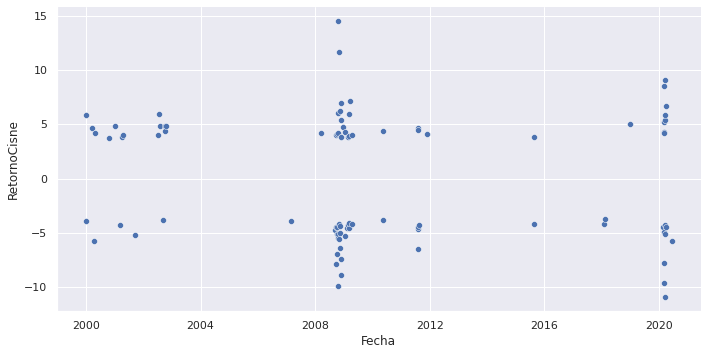

In [ ]:
# Gráfico de cisnes negros para cada año
fig = plt.figure(figsize=(18,14))
g = sns.pairplot(data=df_cisnes_negros,
                 y_vars=['RetornoCisne'],
                 x_vars=['Fecha'],
                 aspect=2, height=5)

Como para algunas fechas por ejemplo entre 2008 y 2012 existen muchos cisnes negros solo vamos a representar los últimos 10 cisnes negros en el gráfico a continuación, para poder visualizar el día exacto que ocurrió el cisne negro. Por ejemplo el 16,17 y 18 de marzo de 2020 existen cisnes negros. Exactamente coincide con el inicio de la pandamia y encontramos noticias asociadas al cisne negro mencionado:
https://www.fundssociety.com/es/opinion/es-el-covid-19-el-cisne-negro-esperado


(array([737497., 737500., 737501., 737502., 737504., 737508., 737510.,
        737516., 737521., 737587.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 1296x1008 with 0 Axes>

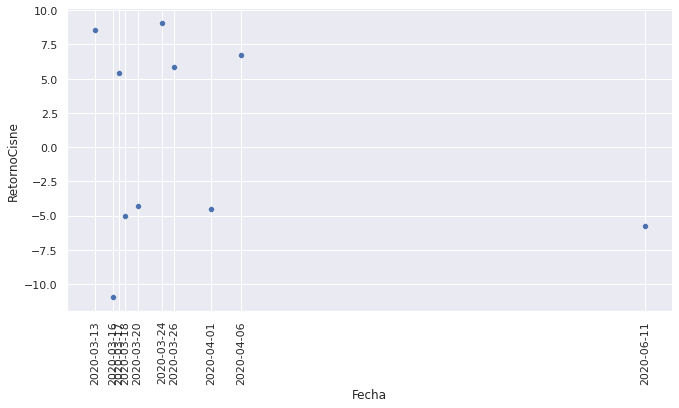

In [ ]:
#Gráfico de los ultimos 5 cisnes negros 
fig = plt.figure(figsize=(18,14))
g = sns.pairplot(data=df_cisnes_negros[-10:],
                 y_vars=['RetornoCisne'],
                 x_vars=['Fecha'],
                 aspect=2, height=5)
plt.xticks(df_cisnes_negros[-10:].Fecha.values)
plt.xticks(rotation=90)


#### Retornos SP500 SIN normalizar

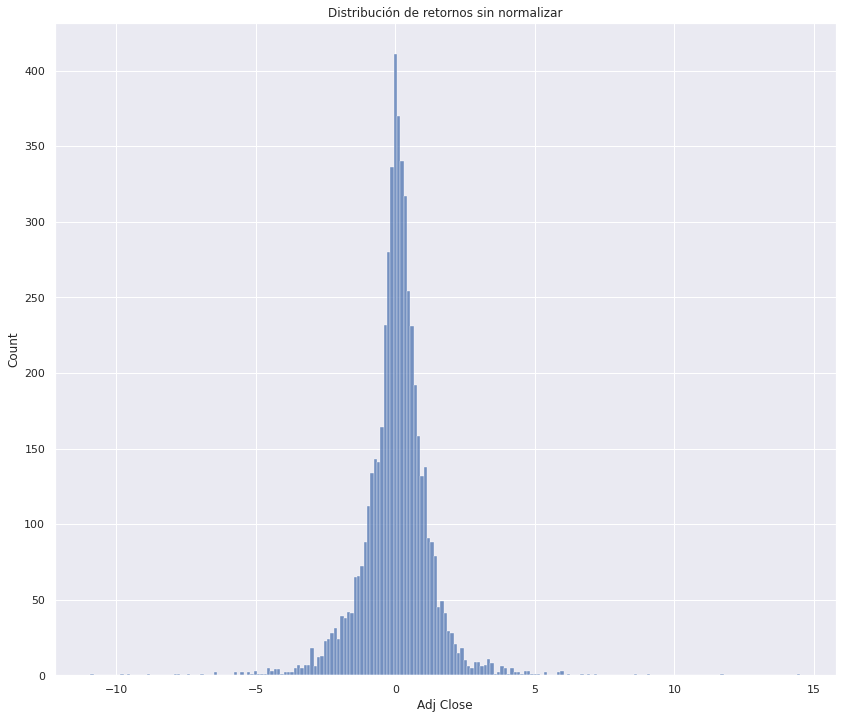

In [ ]:
# Graficar la distribución de los retornos NO normalizados
fig = plt.figure(figsize=(14,12))

sns.set(style="darkgrid")
sns.histplot(return_SP5000_year_since_2000)
plt.title('Distribución de retornos sin normalizar')

plt.show()

#### Retornos SP500 NORMALIZADOS

In [ ]:
#Crear data frame con retornos
df_retornos_s = pd.DataFrame(list(zip(df_merge.Date,return_SP5000_year_since_2000)), columns = ['Date','Retornos'])

#Normalizar retornos
df_retornos_normal = df_retornos_s.Retornos.values.copy().reshape(-1,1)
retornos_normal = RobustScaler().fit_transform(df_retornos_normal)

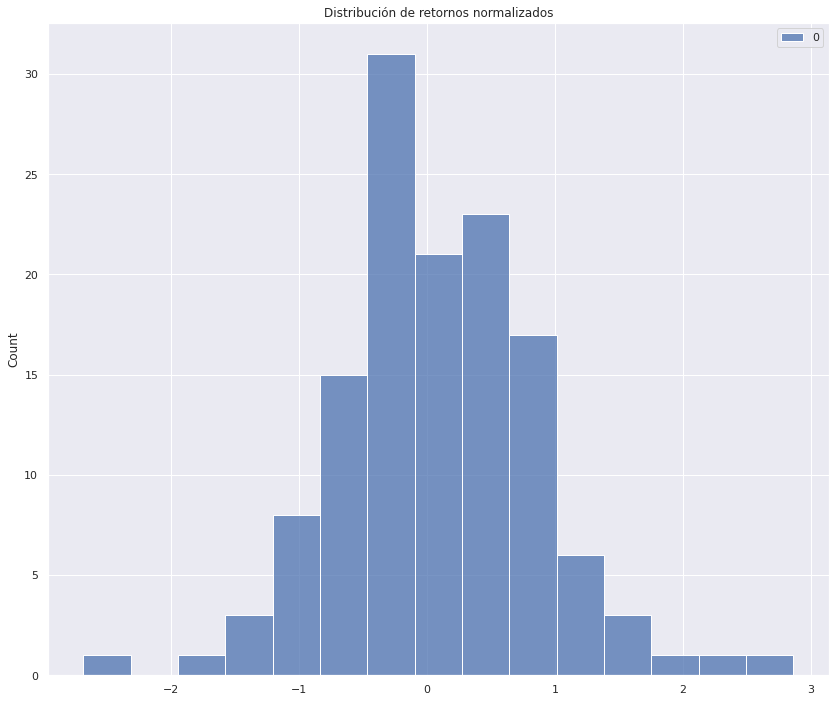

In [ ]:
# Graficar los retornos normalizados
fig = plt.figure(figsize=(14,12))

sns.set(style="darkgrid")
sns.histplot(retornos_normal)
plt.title('Distribución de retornos normalizados')

plt.show()

#### Cisnes negros con retornos normalizados

In [ ]:
# Calcular 2 desviaciones estándar
std2 =std * 2.0

# Buscar cisnes negros para dos desviaciones estándar
list_return = []
list_return_std2 = []
for i in retornos_normal:
  if i[0]>mean_std_max or i[0]<mean_std_min:
     list_return.append(i[0])
  else: 
    if i>std2 or i<std2:
     list_return_std2.append(i[0])

# Imprimir las listas
print("Lista de cisnes negros con retornos con más media 3:", list_return)
print("Lista de cisnes negros con retornos con 2 más menos desviación :", list_return_std2)



Lista de cisnes negros con retornos con más media 3: []
Lista de cisnes negros con retornos con 2 más menos desviación : [-1.8173089520862669, 0.1533893224363978, -0.7072947733958538, 2.8658660066690578, 0.2324987549881915, -0.509446125608298, -0.4121989609374625, 0.7198178043111442, 0.721490087048725, -0.31194608079442343, 0.4596299653782277, -0.6703998919042593, -0.03686437191656696, -1.2986124247682265, 0.6144290519352124, -0.3147681939552625, -0.12529922426465073, -1.436074106410641, 1.3749992904844481, 0.541983188994271, 0.10991295780229153, 0.7931138229410991, -0.13262325118311083, -0.006744773115904577, 0.7229615037816342, -0.9450224144598511, 0.16313691085273824, -0.9114826886474463, 0.34949624428479614, 0.6123217672082036, -0.6426460448019545, -0.1820082182707564, -0.9673830326190406, -0.055233993403248464, 0.6361979935978597, -0.9032040038036455, -0.10724296142040447, 1.07807463297261, 0.5318159687252856, 0.4178160822430394, 0.09979909772209662, 0.9694745561537083, -0.4023419

Para los datos normalizados vemos que no existen cisnes negros con media más menos 3.
Sin embargo para los datos normalizados si existen cisnes negros con más menos 2 desviación estandar.

#### Análisis de la inversión

Suponemos que invertimos U$D 1.000 en el SPY a comienzos del 2000

In [ ]:
# Retornos
ret_SP5000_year_since_2000 = (s.pct_change(periods=1, fill_method='pad', limit=None, freq=None))

# Creamos Dataframe de los retornos de SPY
df_return_SP5000_year_since_2000=ret_SP5000_year_since_2000.rename('retorno').to_frame()

# Se agrega columna inversion con el primer registro de U$D 1.000
df_return_SP5000_year_since_2000['inversion']= np.where(df_return_SP5000_year_since_2000.index=='2000-01-03',1000,np.nan)

# Primer rigistro
df_return_SP5000_year_since_2000[df_return_SP5000_year_since_2000.index=='2000-01-03']

,retorno,inversion
Date,,
2000-01-03,NaN,1000.0


In [ ]:
# Poblamos la nueva columna inversion segun los rendimientos que tuvimos
cant=df_return_SP5000_year_since_2000.shape[0]

for x in range(1,cant):
    df_return_SP5000_year_since_2000['inversion'][x:] = df_return_SP5000_year_since_2000['inversion'].shift(1)[x:] + df_return_SP5000_year_since_2000['inversion'].abs().shift(1)[x:] * df_return_SP5000_year_since_2000['retorno'][x:]

Para la fecha 2020-03-13 teniamos una ganacia y nuestra inversion estaba en U$D 2693

In [ ]:
# Dia anterior a un cisne negro
df_return_SP5000_year_since_2000[df_return_SP5000_year_since_2000.index=='2020-03-13']

,retorno,inversion
Date,,
2020-03-13,0.085486,2693.76797


Ocurre un cisne negro el 2020-03-16 donde tuvimos una perdida de U$D 294 y nuestro capital quedo en U\$D 2399

In [ ]:
# Cisne negro
df_return_SP5000_year_since_2000[df_return_SP5000_year_since_2000.index=='2020-03-16']

,retorno,inversion
Date,,
2020-03-16,-0.109424,2399.005539


Posterior al cisne negro para la fecha 2020-03-17 nuestra inversion estaba en U$D 2528

In [ ]:
df_return_SP5000_year_since_2000[df_return_SP5000_year_since_2000.index=='2020-03-17']

,retorno,inversion
Date,,
2020-03-17,0.053992,2528.532688


Si hubiesemos sacado nuestro dinero antes del cisne negro y puesto el dia posterior tendriamos U$D 2839, hubiesemos ganado U\$D 311 

In [ ]:
#Borramos el registro del cisne negro y calculamos devuelta nuestra inversion
df_return_SP5000_year_since_2000_sc= df_return_SP5000_year_since_2000[df_return_SP5000_year_since_2000.index != '2020-03-16'].copy()
cant=df_return_SP5000_year_since_2000_sc.shape[0]

for x in range(1,cant):
    df_return_SP5000_year_since_2000_sc['inversion'][x:] = df_return_SP5000_year_since_2000_sc['inversion'].shift(1)[x:] + df_return_SP5000_year_since_2000_sc['inversion'].abs().shift(1)[x:] * df_return_SP5000_year_since_2000_sc['retorno'][x:]

df_return_SP5000_year_since_2000_sc[df_return_SP5000_year_since_2000_sc.index=='2020-03-17']

,retorno,inversion
Date,,
2020-03-17,0.053992,2839.209937


LLevado al dia de hoy, habriamos ganado dinero si hubiesemos sacado nuestro dinero antes de ese cisne negro comparado con no realizar ninguna accion

In [ ]:
# Ganancia que tenemos al dia actual
df_return_SP5000_year_since_2000.tail(1)

,retorno,inversion
Date,,
2021-07-14,0.001492,4473.950334


In [ ]:
# Ganancia que tenemos al dia actual sin el cisne negro analizado
df_return_SP5000_year_since_2000_sc.tail(1)

,retorno,inversion
Date,,
2021-07-14,0.001492,5023.658308


Observamos volatidad en nuestra inversion pero un gran rendimiento en el tiempo

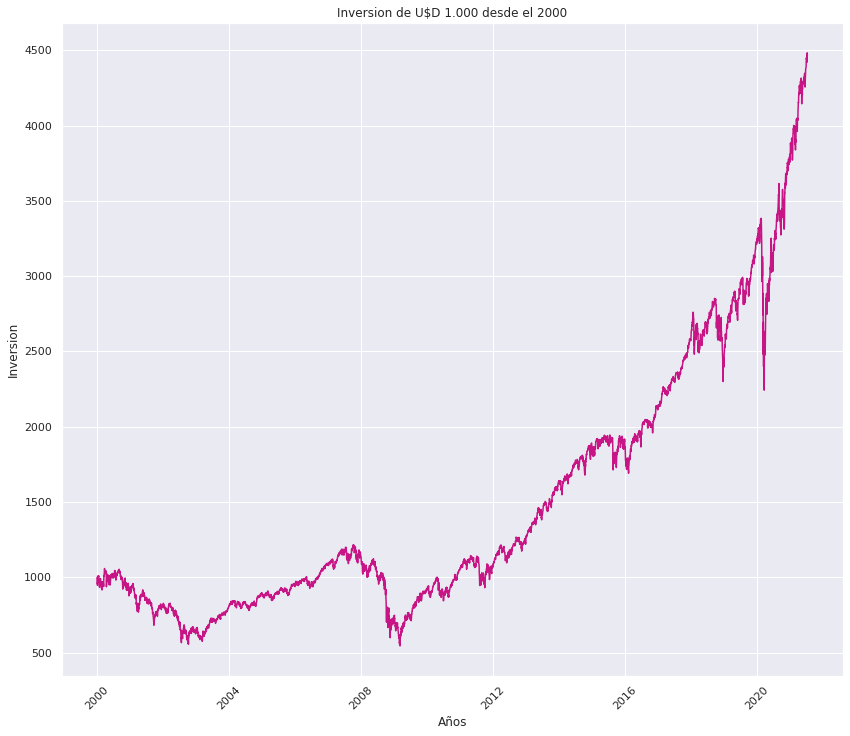

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))
plt.plot(df_return_SP5000_year_since_2000['inversion'], color='mediumvioletred')
plt.title('Inversion de U$D 1.000 desde el 2000')

plt.xlabel("Años", fontdict=None, labelpad=None)
plt.ylabel("Inversion", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.show()

## Cómo se generan los precios diarios?

Si bien los precios con los que estamos trabajando ahora no parecen ser un volumen muy grande de datos, los mismos son resúmenes generados a partir de datos de transacciones de mercado en tiempo real todos los días, para todos los activos financieros. FINRA cuenta un poco cómo es el proceso del punto de vista del gran volumen manejado en [este link](https://technology.finra.org/articles/how-finra-processes-75-billion-market-events-daily.html).

Por lo general, los mercados de acciones permanecen abiertos durante los días hábiles desde aprox. las 11hs hasta las 17hs y durante todo ese período, para todo activo, se realizan ofertas de compra y venta de los mismos, que se van organizando automáticamente en un libro de órdenes como el de la imagen de abajo.

![order_book](https://wp.fxssi.com/wp-content/uploads/2019/04/en_post-images.jpg)

Básicamente, para cada activo, se listan todas las ofertas de compra y venta y se realiza una operación exitosamente cuando coinciden los precios.

## Timeframes

Cómo vimos en el primer práctico y en sus correcciones, es muy importante establer un marco temporal de análisis que sea consistente con la estrategia de inversión.

Para algotrading un timeframe apropiado será el análisis de milisegundos, y para una estrategia de largo plazo el análisis puede ser mensual. 

### Ejercicios

- Transformar los índices realizados en el ejercicio anterior a timeframes mensuales. 

- Para ello en cada fila de datos considerar el Open, Close, High y Low de cada mes. 

- Graficar los cierres ajustados de estas nuevas series contrastandolas contra las series diarias. 

- Comentar: ¿Qué información se gana y se pierde con este cambio? ¿Cuándo se imaginan que puede ser útil tomar esta perspectiva?

#### Transformación de índices mensuales

In [ ]:
# Crear una columa con el año
df_merge_fin['Año'] = df_merge_fin['Date'].dt.year 

# Crear una columna con el mes
df_merge_fin['Mes'] = df_merge_fin['Date'].dt.month 

# Crear indices agrupados mensuales segun corresponda
colClose=['FinancialsAdjClose', 'HealthCareAdjClose',
       'InformationTechnologyAdjClose', 'SPYAdjClose','FinancialsClose',
       'HealthCareClose', 'InformationTechnologyClose', 'SPYClose','Año','Mes']
colOpen=['FinancialsOpen', 'HealthCareOpen',
       'InformationTechnologyOpen', 'SPYOpen','Año','Mes']       
colHigh=['FinancialsHigh', 'HealthCareHigh', 'InformationTechnologyHigh',
       'SPYHigh','Año','Mes']  
colLow=['FinancialsLow', 'HealthCareLow', 'InformationTechnologyLow', 'SPYLow','Año','Mes'] 

df_merge_m_close = df_merge_fin.groupby(pd.Grouper(key='Date',freq='M')).tail(1)[colClose]
df_merge_m_open = df_merge_fin.groupby(pd.Grouper(key='Date',freq='M')).head(1)[colOpen]
df_merge_m_high = df_merge_fin.groupby(pd.Grouper(key='Date',freq='M')).max()[colHigh]
df_merge_m_low = df_merge_fin.groupby(pd.Grouper(key='Date',freq='M')).min()[colLow]

# Merge de los indices
df_merge_fin_month = reduce(lambda left,right: pd.merge(left,right,on=['Mes','Año']), 
                            [df_merge_m_close,df_merge_m_open,df_merge_m_high,df_merge_m_low])

# Imprimir data frame
df_merge_fin_month

,FinancialsAdjClose,HealthCareAdjClose,InformationTechnologyAdjClose,SPYAdjClose,FinancialsClose,HealthCareClose,InformationTechnologyClose,SPYClose,Año,Mes,FinancialsOpen,HealthCareOpen,InformationTechnologyOpen,SPYOpen,FinancialsHigh,HealthCareHigh,InformationTechnologyHigh,SPYHigh,FinancialsLow,HealthCareLow,InformationTechnologyLow,SPYLow
0,7642.084057,14095.737366,13258.759509,367.659088,7701.790075,14131.410101,13300.030035,370.070007,2021,1,7927.340009,14079.994308,13684.559946,375.309998,8309.079988,14798.693279,14218.894949,385.850006,7617.774970,13678.371365,13167.355058,364.820007
1,8305.893321,13941.044595,13950.032476,377.882019,8359.479973,13970.913889,13986.180116,380.359985,2021,2,7781.530001,14252.428045,13458.650026,373.720001,8734.220034,14896.854811,14977.319990,394.170013,7694.759955,13812.977523,13340.464941,370.380005
2,8631.911036,14261.339101,14111.599343,395.037598,8669.560027,14282.219131,14136.979931,396.329987,2021,3,8487.069947,14107.996888,14202.724960,385.589996,8969.610022,14446.911626,14493.974958,398.119995,8234.599993,13347.311866,12877.809992,371.880005
3,9337.095668,15232.001556,14567.730257,415.939209,9370.930006,15249.607781,14589.530069,417.299988,2021,4,8684.579969,14343.235940,14332.221057,398.399994,9477.809999,15673.111637,15260.329969,420.720001,8641.180020,14170.851607,14239.151029,398.179993
4,9601.965935,15315.459242,14593.321677,418.670288,9623.079986,15327.224195,14605.969945,420.040009,2021,5,9435.720055,15330.398729,14684.162045,419.429993,9777.455004,15547.442286,14766.614964,422.820007,9216.490029,14752.789756,13523.155071,404.000000
5,9485.437361,16083.742185,15465.486269,428.059998,9487.499952,16085.039945,15467.350019,428.059998,2021,6,9721.945075,15397.326368,14679.950121,422.570007,9775.740032,16237.890025,15623.310139,428.779999,9046.729023,14864.579999,14342.930006,414.700012
6,9516.239986,16470.970043,15635.270035,436.239990,9516.239986,16470.970043,15635.270035,436.239990,2021,7,9529.959965,16084.639998,15470.950017,428.869995,9727.665051,16704.850069,15876.050036,437.920013,9259.129951,16032.660012,15233.856037,427.519989


#### Gráfico de Vela

In [ ]:
def plotCandlestick(ticker):
  fig = go.Figure(data=[go.Candlestick(x=pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes'],day='1')),
                                       open=df_merge_fin_month[ticker+'Open'], high=df_merge_fin_month[ticker+'High'],
                                       low=df_merge_fin_month[ticker+'Low'], close=df_merge_fin_month[ticker+'Close'])
  ])

  fig.update_layout(xaxis_rangeslider_visible=False,title=ticker,yaxis_title=ticker+' Stock',)
  fig.show()

In [ ]:
plotCandlestick('Financials')

El agrupamiento mensual de las acciones del sector financiero del sp500 da cuenta de su performance en términos de apertura, cierre y volumen del sector. En este sentido podemos observar que los meses de Enero, y Junio, el precio de apertura de cada mes fue mayor al precio de cierre, siendo junio el mes de mayor volumen.
De esta manera podemos mencionar que de Enero a Junio el cierre de las acciones del sector tuvo un comportamiento creciente.

In [ ]:
plotCandlestick('HealthCare')

Las acciones que conforman el sector de Servicos de salud muestran un comportamiento creciente del precio de cierre entre enero y julio, siendo febrero y mayo los meses en los que el precio de apertura fue mayor al precio de cierre del mes.
En este sentido el mes con mayor dispersión y volumen fue abril donde el precio de apertura se colocó por debajo del precio de cierre.


In [ ]:
plotCandlestick('InformationTechnology')

El gráfico de velas mensuales de las acciones del sector tecnológico del Sp 500 muestra una mayor variación en sus precios de apertura y cierre que el sector Financiero. Los meses de mayor dispersión  de precios de cierre y apertura son Marzo y Mayo donde el precio de apertura de fue mayor al de cierre.

In [ ]:
plotCandlestick('SPY')

En relación a la evolución del SP500 podemos observar que el mes de Enero el precio de apertura de cada mes fue mayor al precio de cierre.
De esta manera podemos mencionar que de Enero a Junio el cierre de las acciones del sector tuvo un comportamiento creciente, lo que indica que la inversión en el índice tuvo un crecimineto nominal desde Enero.

#### Gráfico de Adj Close mensual sin normalizar

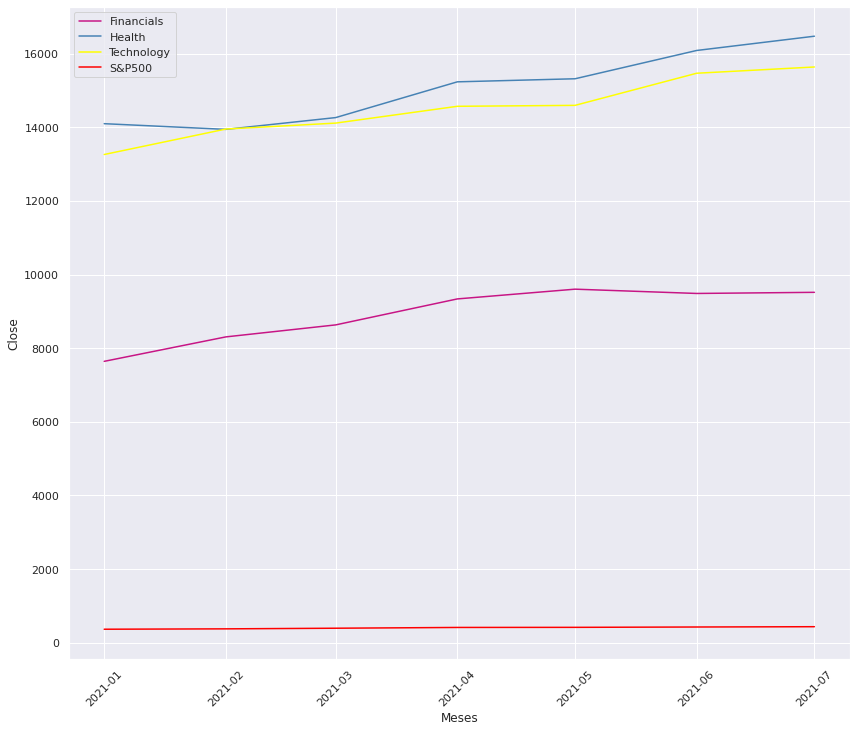

In [ ]:
#Graficar de los Adj Close
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes'],day='1')),
         df_merge_fin_month['FinancialsAdjClose'], color='mediumvioletred')
plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes'],day='1')),
         df_merge_fin_month['HealthCareAdjClose'], color='steelblue')
plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes'],day='1')),
         df_merge_fin_month['InformationTechnologyAdjClose'], color='yellow')
plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes'],day='1')),
         df_merge_fin_month['SPYAdjClose'], color='red')

plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['Financials','Health','Technology','S&P500'])
plt.show()

La evolución del cierre mensual de cada sector y del indice sp500 sin normalizar reviste de las mismas dificultades mencionadas anteriormente. Las diferencia en las escalas distorsiona la comparación entre el indice y los sectores que lo componen.


#### Normalización

In [ ]:
# Normalizar Adj Close Financials mensual
df_merge_normal_financials = df_merge_fin_month.FinancialsAdjClose.values.copy().reshape(-1,1)
df_merge_normal_financials_scaled = RobustScaler().fit_transform(df_merge_normal_financials)

# Normalizar Adj Close HealthCare mensual
df_merge_normal_healthCareAdjClose = df_merge_fin_month.HealthCareAdjClose.values.copy().reshape(-1,1)
df_merge_normal_healthCareAdjClose_scaled = RobustScaler().fit_transform(df_merge_normal_healthCareAdjClose)

# Normalizar Adj Close InformationTechnology mensual
df_merge_normal_TechnologyAdjClose = df_merge_fin_month.InformationTechnologyAdjClose.values.copy().reshape(-1,1)
df_merge_normal_TechnologyAdjClose_scaled = RobustScaler().fit_transform(df_merge_normal_TechnologyAdjClose)

# Normalizar Adj Close de S&P500 mensual
df_merge_normal_s = df_merge_fin_month.SPYAdjClose.values.copy().reshape(-1,1)
df_merge_normal_s_scaled = RobustScaler().fit_transform(df_merge_normal_s)

# Mergear de todos los valores normalizados mensual
df_merge_m_normalizada = pd.DataFrame(list(zip(df_merge_normal_financials_scaled,df_merge_normal_healthCareAdjClose_scaled,df_merge_normal_TechnologyAdjClose_scaled,df_merge_normal_s_scaled, df_merge_fin_month.Mes,df_merge_fin_month.Año)), columns = ['Financials','Health','Technology','SP500','Mes','Año'])

# Imprimir data frame normalizado mensual
df_merge_m_normalizada

,Financials,Health,Technology,SP500,Mes,Año
0,[-1.642554187666868],[-0.7470200636952913],[-1.3108215450729142],[-1.3082152360759902],1,2021
1,[-0.9992885724759297],[-0.848720534908485],[-0.6185711639741903],[-1.031211083308388],2,2021
2,[-0.6833604925133429],[-0.638147655562518],[-0.4567758523514279],[-0.5663574555491792],3,2021
3,[0.0],[0.0],[0.0],[0.0],4,2021
4,[0.2566730300188702],[0.05486801927562588],[0.02562760473083392],[0.07400228559331985],5,2021
5,[0.14375079636012825],[0.5599642614665649],[0.8990253789435478],[0.328429175549113],6,2021
6,[0.17360013865059915],[0.8145414820882388],[1.0690492076301845],[0.5500771511782713],7,2021


#### Gráfico Adj Close mensual con normalización

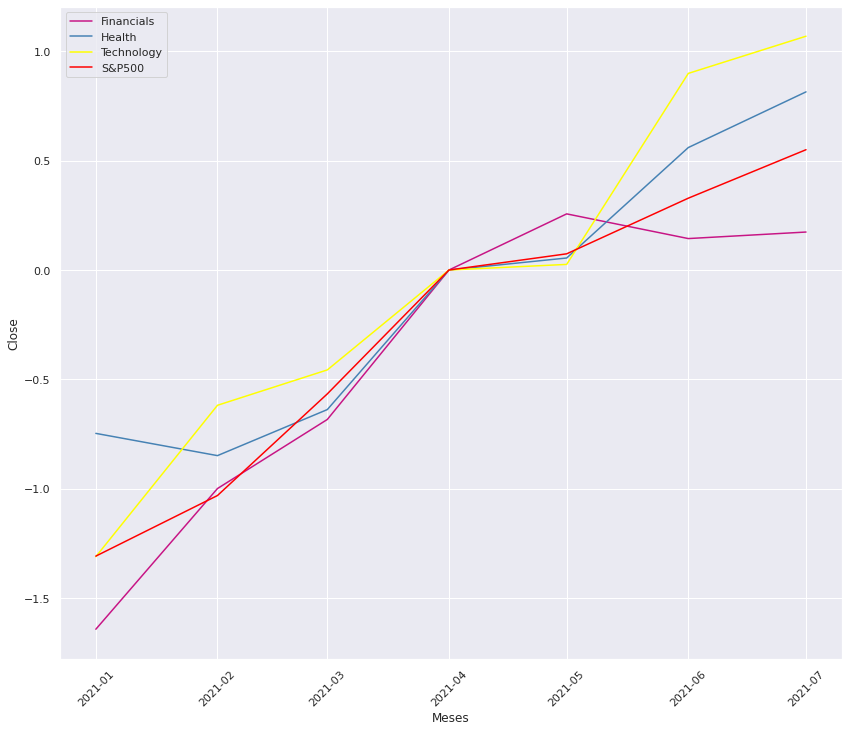

In [ ]:
#Gráficar Adj Close Normalizados mensuales
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_m_normalizada['Año'], month=df_merge_m_normalizada['Mes'],day='1')),
         df_merge_m_normalizada['Financials'], color='mediumvioletred')
plt.plot(pd.to_datetime(dict(year=df_merge_m_normalizada['Año'], month=df_merge_m_normalizada['Mes'],day='1')),
         df_merge_m_normalizada['Health'], color='steelblue')
plt.plot(pd.to_datetime(dict(year=df_merge_m_normalizada['Año'], month=df_merge_m_normalizada['Mes'],day='1')),
         df_merge_m_normalizada['Technology'], color='yellow')
plt.plot(pd.to_datetime(dict(year=df_merge_m_normalizada['Año'], month=df_merge_m_normalizada['Mes'],day='1')),
         df_merge_m_normalizada['SP500'], color='red')


plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['Financials','Health','Technology','S&P500'])
plt.show()

Podemos observar que los sectores con mayor crecimiento de su cierre son Tecnología y Salud. A partir de abril el cierre del sector Financiero crece con mayor velocidad que el de los restantes sectores pero esta tendencia cambia a partir de mayo , en donde el precio de cierre de estos útlimos comienza a crecer con mayor velocidad mientras que el correspondiente al sector financiero decrece hasta Junio.

#### Contraste de los cierres ajustados mensuales con los diarios

#### Financials

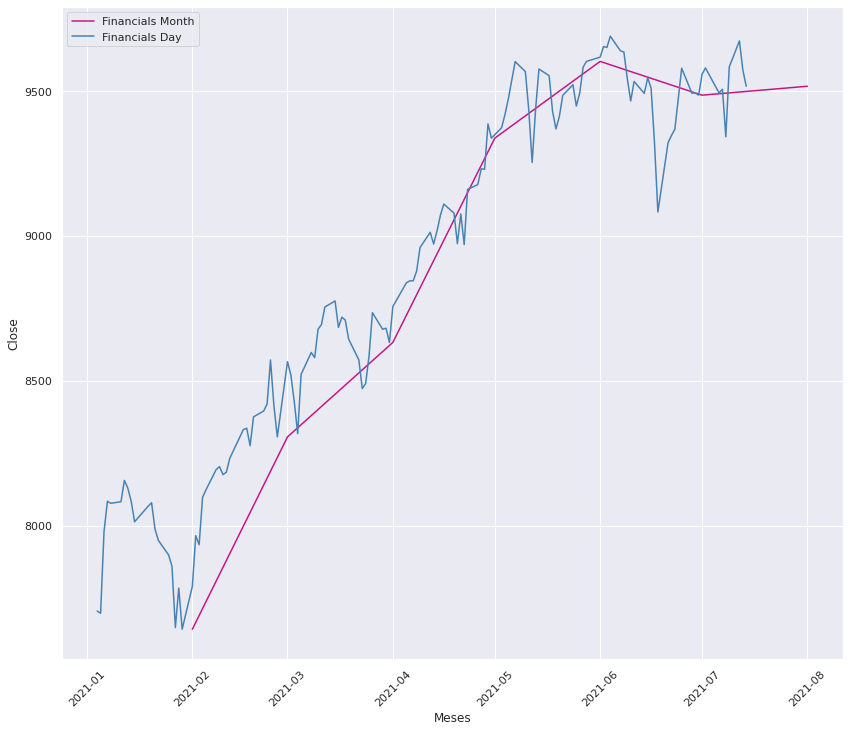

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes']+1,day='1')),
         df_merge_fin_month['FinancialsAdjClose'], color='mediumvioletred')
plt.plot(df_merge_fin['Date'],df_merge_fin['FinancialsAdjClose'], color='steelblue')


plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['Financials Month','Financials Day'])
plt.show()

La evolución del precio mensual de cierre del sector financiero muestra una un incremento desde febrero a junio.A partir de ese momento  comienza una tendencia lateral de su precio de cierre.

#### **Health Care**

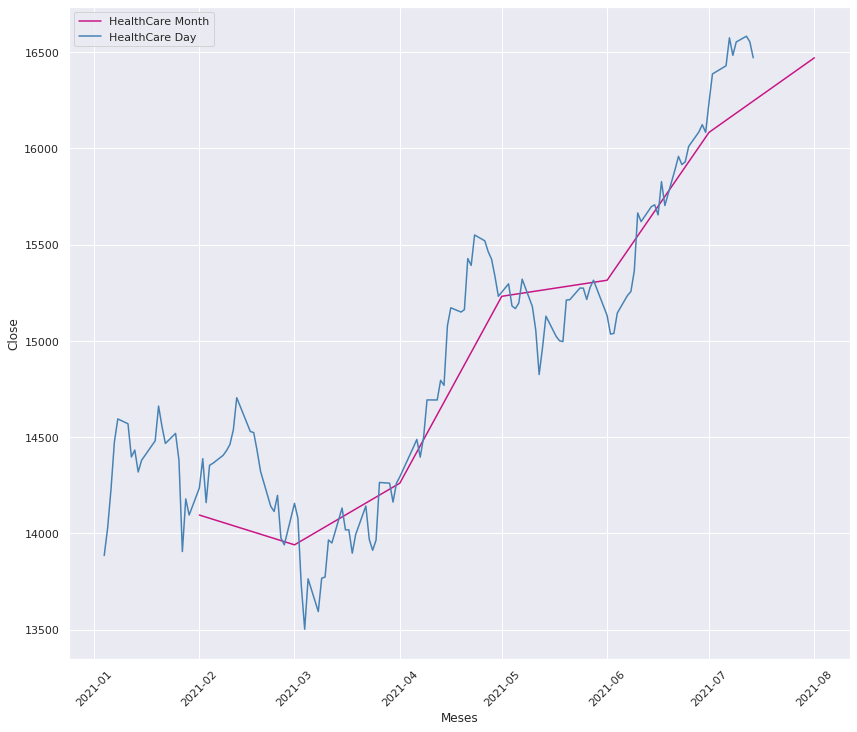

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes']+1,day='1')),
         df_merge_fin_month['HealthCareAdjClose'], color='mediumvioletred')
plt.plot(df_merge_fin['Date'],df_merge_fin['HealthCareAdjClose'], color='steelblue')


plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['HealthCare Month','HealthCare Day'])
plt.show()

La evolución del precio mensual de cierre del sector salud muestra un incremento pronunciado desde marzo a mayo .A partir de ese momento la tendencia disminuye su ritmo hasta el mes de junio momento en el cual se observa un nuevo incremento más acelerado.



#### Information Technology

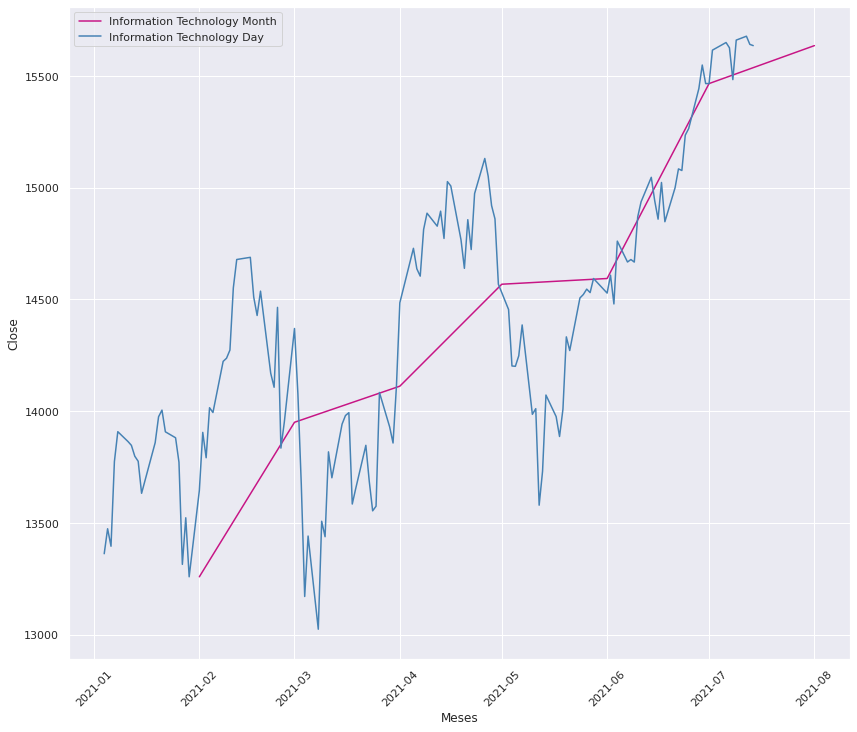

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes']+1,day='1')),
         df_merge_fin_month['InformationTechnologyAdjClose'], color='mediumvioletred')
plt.plot(df_merge_fin['Date'],df_merge_fin['InformationTechnologyAdjClose'], color='steelblue')


plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['Information Technology Month','Information Technology Day'])
plt.show()

El sector teconológico muestra un comportamiento creciente en el precio mensual de cierre, con una diminución en el ritmo de crecimiento entre mayo y junio, para aumentar el ritmo en su incremento.
Por otro lado el precio de cierre diario muestra una mayor variación mostrando una fuerte caída durante algunos días de  marzo y mayo, para luego exhibir una tendencia creciente hasta el mes de julio.

#### SPY

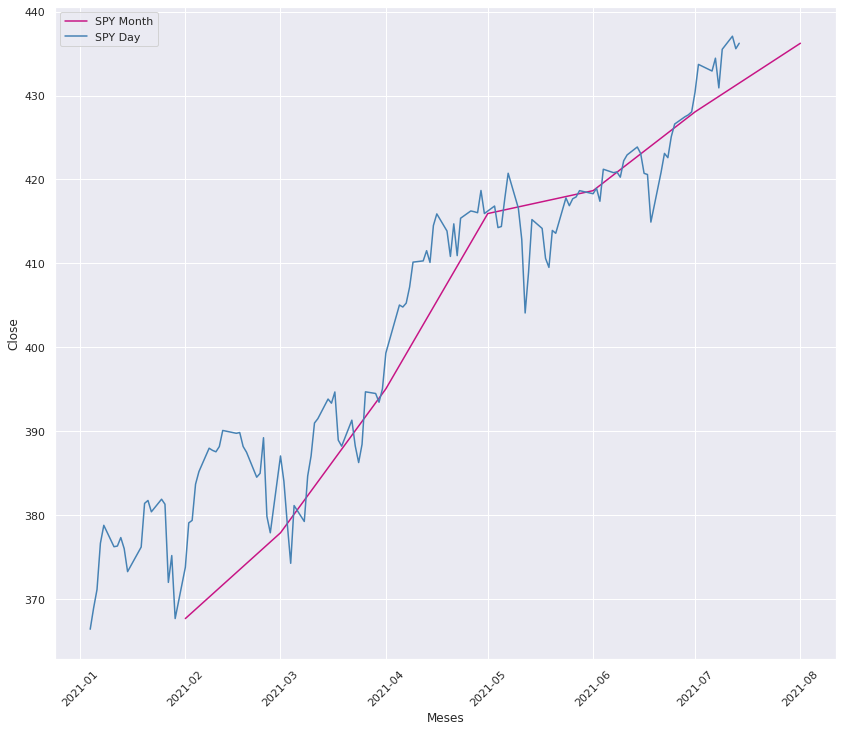

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(14,12))

plt.plot(pd.to_datetime(dict(year=df_merge_fin_month['Año'], month=df_merge_fin_month['Mes']+1,day='1')),
         df_merge_fin_month['SPYAdjClose'], color='mediumvioletred')
plt.plot(df_merge_fin['Date'],df_merge_fin['SPYAdjClose'], color='steelblue')


plt.xlabel("Meses", fontdict=None, labelpad=None)
plt.ylabel("Close", fontdict=None, labelpad=None)

plt.xticks(rotation=45)
plt.legend(['SPY Month','SPY Day'])
plt.show()

Entendemos que una persona que tiene una estrategia de inversión a largo plazo le puede ser más valiosa la información mensual ya que no está pendiente de los movimientos constantes del activo y esta le da una visión más amplia del comportamiento, pero una con una estrategia a corto plazo necesita ver el día a día y tendría un sesgo grande al ver solo series mensuales ya que no vería la volatizad del activo o sector en este caso y esto le impediría tomar decisiones rápidamente.
En este sentido la información que procesemos y analicemos es útil en función del tipo de inversión que estemos considerando. Si nuestro horizonte temporal de inversión es en el mediano y largo plazo los datos de evolución mensual de los cierres de los activos en los que se invirtió son relevantes porque la performance de nuestra inversión está siendo evaluada en función de ese rango temporal.